In [9]:
import pandas as pd
import numpy as np
import os
import plotly.express as px

### Initialisation

In [6]:
dataset = "OVA_mouse"
mode = "full_VDJ"

### Evo Likelihoods vs Lengths

In [ ]:
data = pd.read_csv(os.path.join("..","..","..","data",dataset,"vdj_evolike_combine.csv"))
data = data.drop_duplicates("full_VDJ_aa")

model = "sapiens"

melted_data = data.melt(id_vars=["barcode","VDJ_cdr3_length","full_VDJ_length"], 
                        value_vars=[f"evo_likelihood_{model}_full_VDJ", f"evo_likelihood_{model}_cdr3_only",f"evo_likelihood_{model}_cdr3_from_VDJ"], 
              var_name='source', value_name='likelihood')

melted_data["source_sequence_length"] = melted_data.apply(lambda x: x["full_VDJ_length"] if x["source"] == f"evo_likelihood_{model}_full_VDJ"
                                                          else x["VDJ_cdr3_length"], axis = 1)

In [ ]:
melted_data

In [ ]:
fig = px.scatter(
    data_frame = melted_data,
    # facet_col = "sample_id",
    # facet_col_wrap = 2,
    x = "source_sequence_length",
    y = "likelihood",
    trendline="ols",
    color="source",
    # trendline_color_override="red",
    opacity = 0.01,
    orientation = "v",
    title='likelihood vs sequence length',
)

fig.update_layout(height = 400 )
fig.show()

### Evo likelihoods versus isotype

In [ ]:
data = pd.read_csv(os.path.join("..","..","..","data",dataset,"vdj_evolike_combine.csv"))
data = data.loc[data["c_gene"].apply(lambda x: x in ["IGHG","IGHM","IGHA"]),:]
data = data.drop_duplicates("full_VDJ_aa")

models = ["protbert","ESM","ablang","sapiens"]
sources = ["full_VDJ","cdr3_from_VDJ","cdr3_only"]

value_vars_cols = []

for model in models:
    for source in sources:
        data = data.rename(columns={f"evo_likelihood_{model}_{source}":f"evo_likelihood_{model}-{source}"})
        value_vars_cols.append(f"evo_likelihood_{model}-{source}")
        
melted_data = data.melt(id_vars=["barcode","c_gene","sample_id"], value_vars= value_vars_cols, var_name='model_source', value_name='likelihood')
melted_data["source"] = melted_data["model_source"].apply(lambda x: x.split("-")[1])
melted_data["model"] =  melted_data["model_source"].apply(lambda x: (x.split("-")[0]).split("_")[-1])
                                                                                                    

In [ ]:
model_of_interest = "ESM"
sources_of_interest = ["full_VDJ","cdr3_from_VDJ","cdr3_only"]

melted_data_plotting = melted_data.loc[melted_data["model"] == model_of_interest,:]

fig = px.box(
    data_frame = melted_data_plotting,
    points = False,
    facet_col = "model",
    facet_col_wrap = 2,
    x = "source",
    color="c_gene",
    y = ["likelihood"],
    # opacity = 0.9,
    orientation = "v",
    # barmode = 'group',
    title='Evo likelihood distribution by isotype',
    # text_auto="0.2f"
)

fig.update_layout(height = 800, font_size = 30)
# fig.update_traces(textfont_size=10, textangle=0, cliponaxis=False)

fig.show()

In [ ]:
model_of_interest = "ESM"
source_of_interest = "full_VDJ"

melted_data_plotting = melted_data.loc[melted_data["source"] == source_of_interest,:]

fig = px.box(
    data_frame = melted_data_plotting,
    points = False,
    facet_col = "source",
    facet_col_wrap = 2,
    x = "model",
    color="c_gene",
    y = ["likelihood"],
    # opacity = 0.9,
    orientation = "v",
    # barmode = 'group',
    title='Evo likelihood distribution by isotype',
    # text_auto="0.2f"
)

fig.update_layout(height = 800, font_size = 30)
# fig.update_traces(textfont_size=10, textangle=0, cliponaxis=False)

fig.show()

### Evo Likelihoods by V-gene

In [21]:
data = pd.read_csv(os.path.join("..","..","..","data",dataset,"vdj_evolike_combine.csv"))
data = data.drop_duplicates("full_VDJ_aa")

models = ["protbert","ESM","ablang","sapiens"]
sources = ["full_VDJ","cdr3_from_VDJ","cdr3_only"]

value_vars_cols = []

for model in models:
    for source in sources:
        data = data.rename(columns={f"evo_likelihood_{model}_{source}":f"evo_likelihood_{model}-{source}"})
        value_vars_cols.append(f"evo_likelihood_{model}-{source}")
        
melted_data = data.melt(id_vars=["barcode","c_gene","sample_id","v_gene","v_gene_family"], value_vars= value_vars_cols, var_name='model_source', value_name='likelihood')
melted_data["source"] = melted_data["model_source"].apply(lambda x: x.split("-")[1])
melted_data["model"] =  melted_data["model_source"].apply(lambda x: (x.split("-")[0]).split("_")[-1])

In [ ]:
melted_data

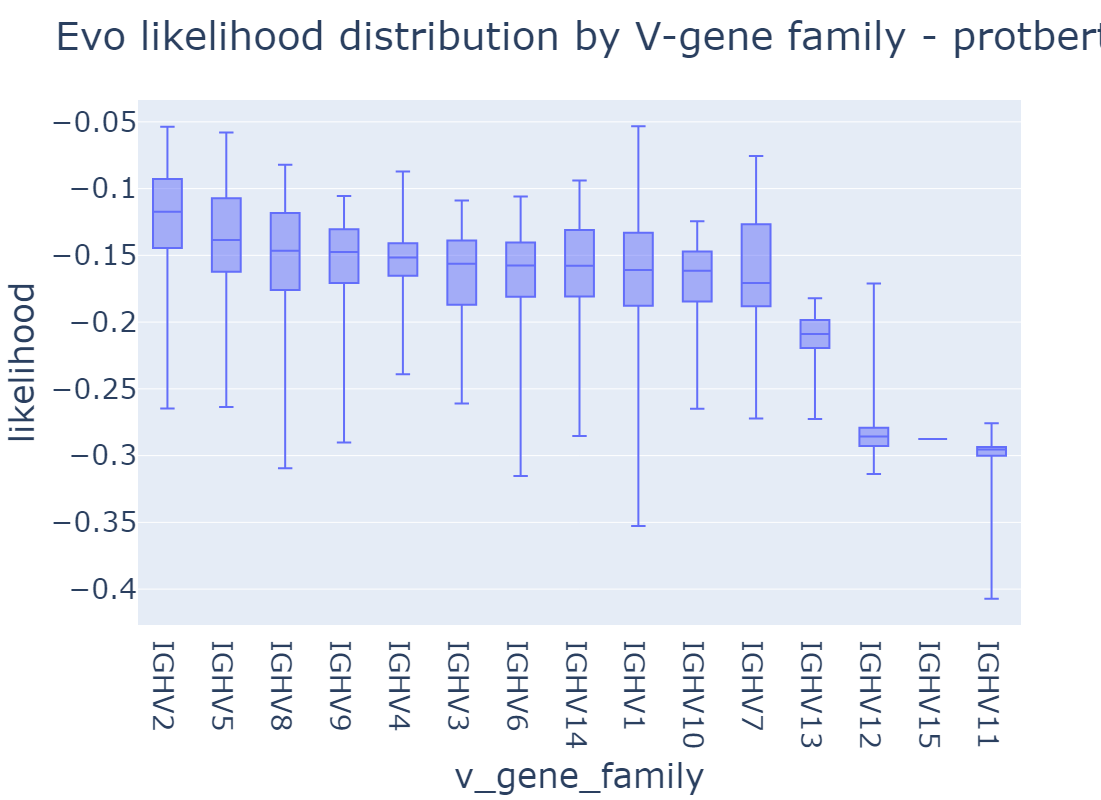

In [25]:
model_of_interest = "protbert"
source_of_interest = "full_VDJ"

melted_data_plotting = melted_data.loc[(melted_data["source"] == source_of_interest) & (melted_data["model"] == model_of_interest),:]
melted_data_plotting_groupby = melted_data_plotting[["v_gene_family","likelihood"]].groupby("v_gene", as_index=False).median()
melted_data_plotting_groupby = melted_data_plotting_groupby.sort_values("likelihood", ascending = False)
plotting_order = list(melted_data_plotting_groupby["v_gene_family"])

fig = px.box(
    data_frame = melted_data_plotting,
    points = False,
    # facet_col = "source",
    # facet_col_wrap = 2,
    x = "v_gene_family",
    # color="c_gene",
    y = "likelihood",
    # opacity = 0.9,
    orientation = "v",
    # barmode = 'group',
    title=f'Evo likelihood distribution by V-gene family - {model_of_interest}',
    # text_auto="0.2f"
)

fig.update_layout(height = 800, font_size = 28)
fig.update_xaxes(categoryarray= plotting_order)
# fig.update_traces(textfont_size=10, textangle=0, cliponaxis=False)

fig.show()

In [29]:
melted_data_plotting["v_gene"].value_counts()

IGHV1-4     290
IGHV2-9     281
IGHV9-3     280
IGHV4-1     253
IGHV3-1     238
IGHV1-18    231
IGHV6-6     221
IGHV1-5     208
IGHV5-6     200
IGHV1-53    182
Name: v_gene, dtype: int64

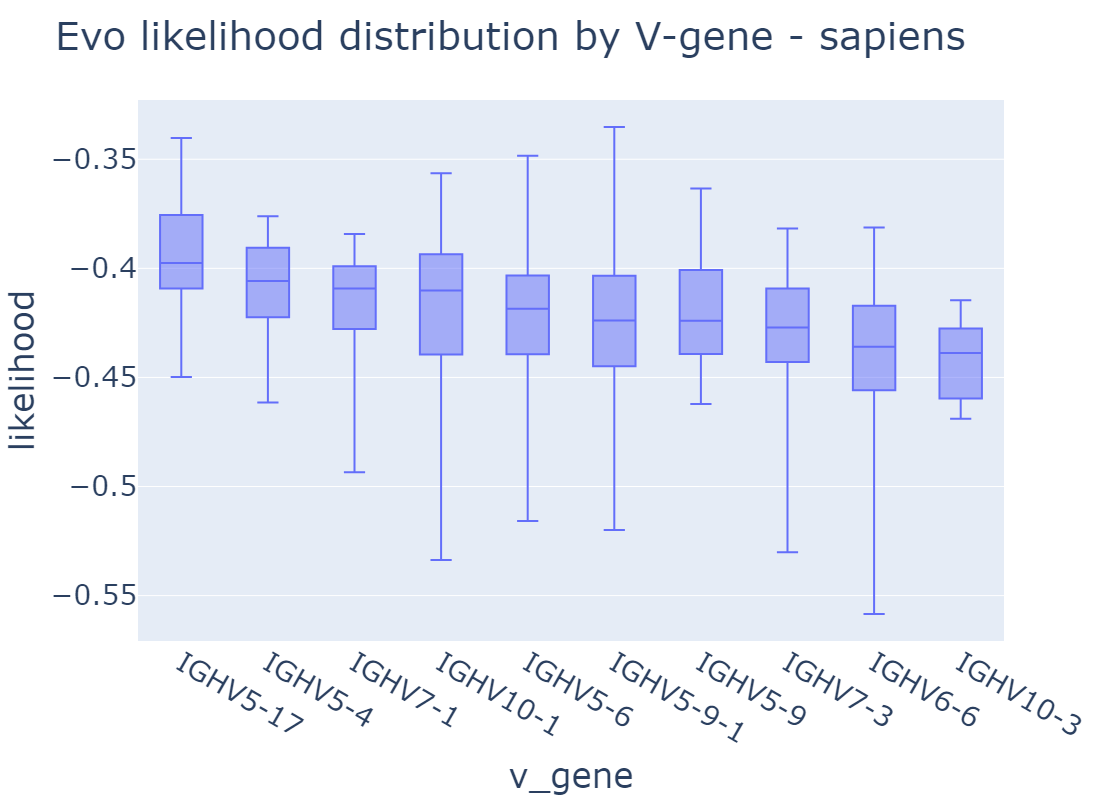

In [38]:
model_of_interest = "sapiens"
source_of_interest = "full_VDJ"
top_k = 10

melted_data_plotting = melted_data.loc[(melted_data["source"] == source_of_interest) & (melted_data["model"] == model_of_interest),:]
melted_data_plotting_groupby = melted_data_plotting[["v_gene","likelihood"]].groupby("v_gene", as_index=False).median()
melted_data_plotting_groupby = melted_data_plotting_groupby.sort_values("likelihood", ascending = False)

top_k_v_genes = list(melted_data_plotting_groupby["v_gene"])[:top_k]

select_topk = melted_data_plotting["v_gene"].apply(lambda x: x in top_k_v_genes)
melted_data_plotting = melted_data_plotting.loc[select_topk,:]

# melted_data_plotting_groupby = melted_data_plotting[["v_gene","likelihood"]].groupby("v_gene", as_index=False).median()
# melted_data_plotting_groupby = melted_data_plotting_groupby.sort_values("likelihood", ascending = False)

plotting_order = top_k_v_genes

fig = px.box(
    data_frame = melted_data_plotting,
    points = False,
    # facet_col = "source",
    # facet_col_wrap = 2,
    x = "v_gene",
    # color="c_gene",
    y = "likelihood",
    # opacity = 0.9,
    orientation = "v",
    # barmode = 'group',
    title=f'Evo likelihood distribution by V-gene - {model_of_interest}',
    # text_auto="0.2f"
)

fig.update_layout(height = 800, font_size = 28)
fig.update_xaxes(categoryarray= plotting_order)
# fig.update_traces(textfont_size=10, textangle=0, cliponaxis=False)

fig.show()